### Loading The Data

In [ ]:
# Data manipulation using Numpy and Pandas
import numpy as np 
import pandas as pd

# Data visualization using Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

titanic = pd.read_csv("https://raw.githubusercontent.com/vamsivarma/datasets/master/data_science/pandas/titanic.csv")
covid19 = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv")
covid19.columns

#X = np.random.random((10,5)) 
#y = np.array(['M','M','F','F','M','F','M','M','F','F','F'])

Index(['data', 'stato', 'codice_regione', 'denominazione_regione', 'lat',
       'long', 'ricoverati_con_sintomi', 'terapia_intensiva',
       'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi',
       'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti',
       'deceduti', 'totale_casi', 'tamponi', 'casi_testati', 'note_it',
       'note_en'],
      dtype='object')

In [ ]:
covid19.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN,NaN


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Data Preprocessing 

#### Encoding Categorical Features

Now, let us encode all the categorical values in to numerical values for our ML algorithm

Pandas allows for a quick conversion from categorical to numeric columns with its get_dummies method. After this step, we have a clean dataset with strictly numerical columns that we can feed into machine learning models.

In [ ]:
titanic = pd.get_dummies(titanic, columns=['pclass', 'sex', 'embarked', 'embark_town', 'class', 'who', 'adult_male', 'alive', 'alone', 'deck'], drop_first=True)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   age                      714 non-null    float64
 2   sibsp                    891 non-null    int64  
 3   parch                    891 non-null    int64  
 4   fare                     891 non-null    float64
 5   pclass_2                 891 non-null    uint8  
 6   pclass_3                 891 non-null    uint8  
 7   sex_male                 891 non-null    uint8  
 8   embarked_Q               891 non-null    uint8  
 9   embarked_S               891 non-null    uint8  
 10  embark_town_Queenstown   891 non-null    uint8  
 11  embark_town_Southampton  891 non-null    uint8  
 12  class_Second             891 non-null    uint8  
 13  class_Third              891 non-null    uint8  
 14  who_man                  8

#### As we can observe the columnn age has null values, lets see approaches we can take to handle these null values

### Visualizing null values

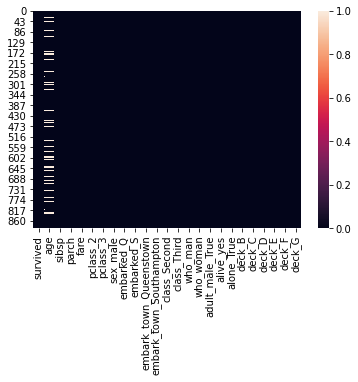

In [ ]:
sns.heatmap(titanic.isnull()) 
plt.show()

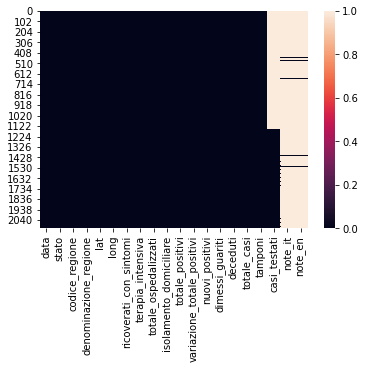

In [ ]:
sns.heatmap(covid19.isnull()) 
plt.show()

### FILL NAN values in dataset 

In [ ]:
# Method 1 - replace null values with 0
# df.fillna(0, inplace=True)

# Method 2 - drop rows with null values
# df.dropna(inplace=True)

# Method 3 - replace null values with the mean of field
#titanic['age'].fillna(titanic['age'].mean(), inplace=True)


# Method 4 - Use predictive filling
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html
titanic['age'].interpolate(method='linear', 
                           limit_direction='forward', 
                           axis=0, inplace=True)

drop_first = True gets rid of collinearity in the predictor matrix

In [ ]:
#titanic['age']
titanic.head()

,survived,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,...,who_woman,adult_male_True,alive_yes,alone_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0,22.0,1,0,7.2500,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,...,1,0,1,1,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
4,0,35.0,0,0,8.0500,0,1,1,0,1,...,0,1,0,1,0,0,0,0,0,0


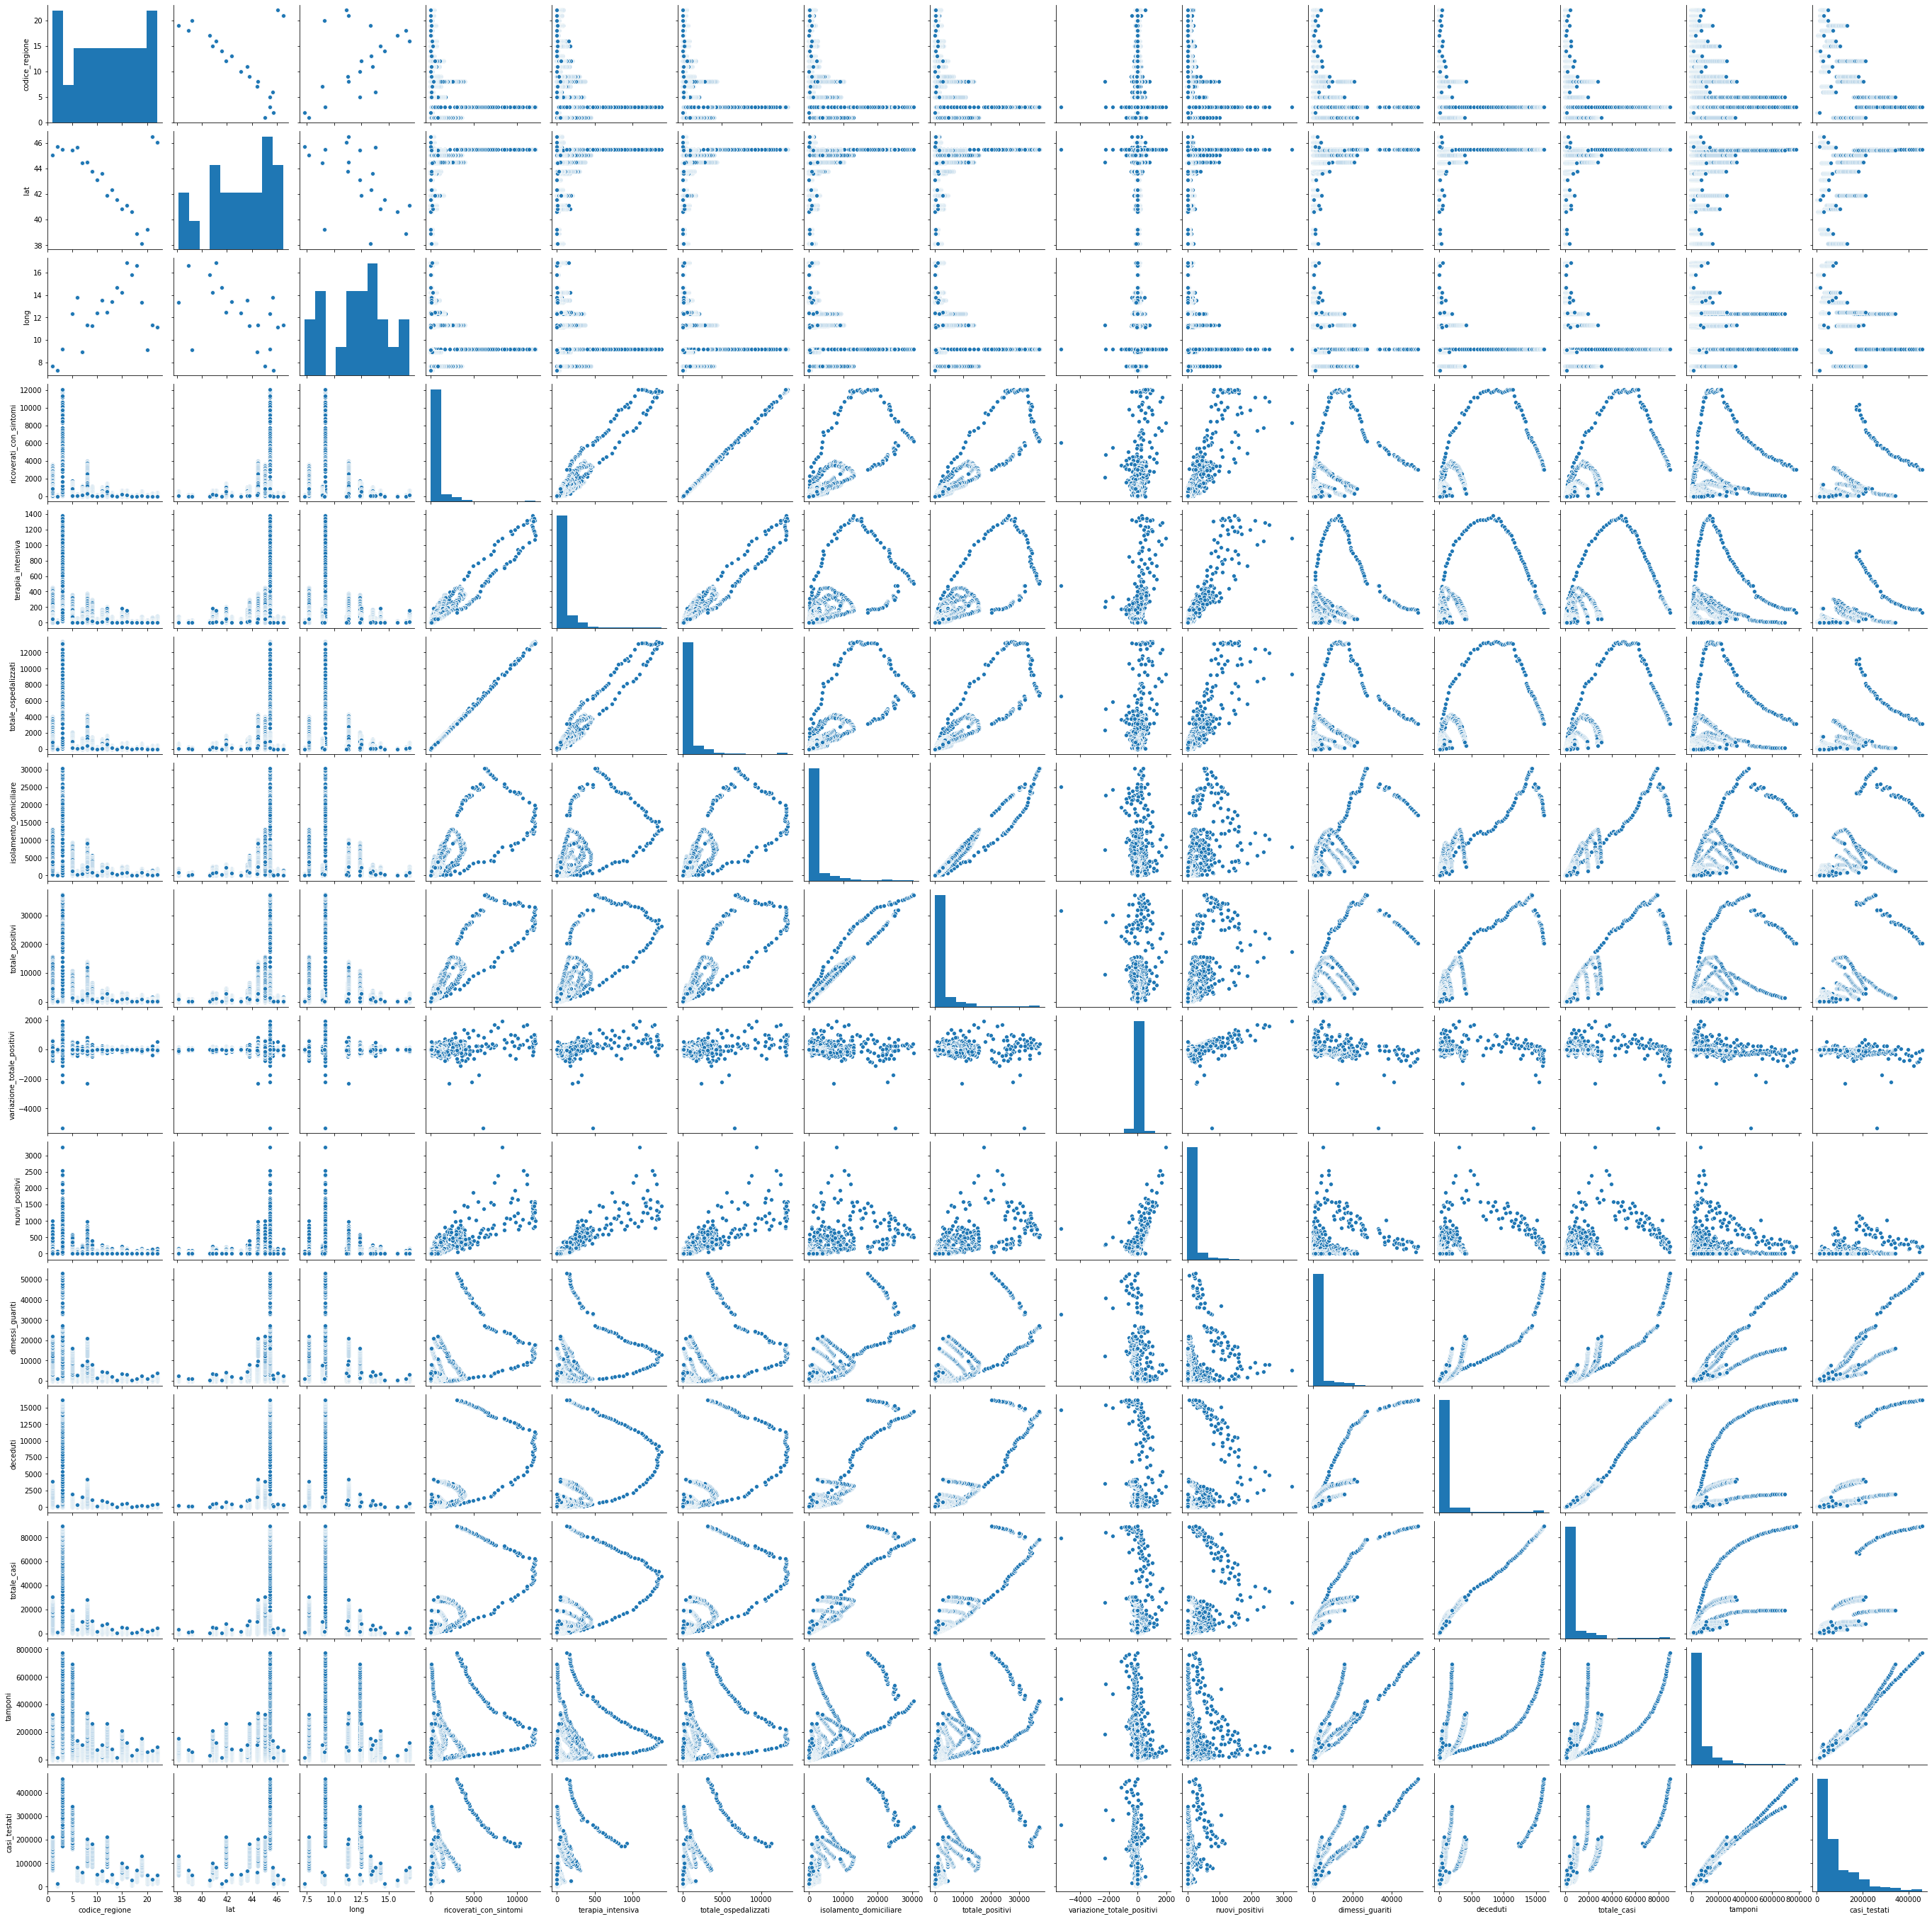

In [ ]:
sns.pairplot(covid19)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

### Spilling the dataset in to train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split
X = titanic.drop('survived', axis=1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#print(X_train)

In [ ]:
import sklearn
dir(sklearn.preprocessing)

['Binarizer',
 'FunctionTransformer',
 'Imputer',
 'KernelCenterer',
 'LabelBinarizer',
 'LabelEncoder',
 'MaxAbsScaler',
 'MinMaxScaler',
 'MultiLabelBinarizer',
 'Normalizer',
 'OneHotEncoder',
 'PolynomialFeatures',
 'QuantileTransformer',
 'RobustScaler',
 'StandardScaler',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_function_transformer',
 'add_dummy_feature',
 'binarize',
 'data',
 'imputation',
 'label',
 'label_binarize',
 'maxabs_scale',
 'minmax_scale',
 'normalize',
 'quantile_transform',
 'robust_scale',
 'scale']

#### Standardization

In [ ]:
X_train

,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,embark_town_Queenstown,...,who_woman,adult_male_True,alive_yes,alone_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
285,33.000000,0,0,8.6625,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
45,18.800000,0,0,8.0500,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
471,38.000000,0,0,8.6625,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
307,17.000000,1,0,108.9000,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
212,22.000000,0,0,7.2500,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,30.000000,3,0,21.0000,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
716,38.000000,0,0,227.5250,0,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0
221,27.000000,0,0,13.0000,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
563,26.666667,0,0,8.0500,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler().fit(X_train) 
standardized_X = scaler.transform(X_train) 
standardized_X_test = scaler.transform(X_test)

In [ ]:
print(standardized_X.shape)
print(standardized_X.max())
print(standardized_X.min())
print(standardized_X.mean())
print(standardized_X.std())

(712, 24)
15.373136743466944
-2.108221937281634
4.158138669008077e-19
1.0


In [ ]:
print(standardized_X_test.shape)
print(standardized_X_test.max())
print(standardized_X_test.min())
print(standardized_X_test.mean())
print(standardized_X_test.std())

(179, 24)
15.373136743466944
-2.078593484479535
0.008846699112634889
1.0135717064843248


In [ ]:
dir(np.ndarray)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

#### Normalization

In [ ]:
from sklearn.preprocessing import Normalizer 
scaler = Normalizer().fit(X_train) 
normalized_X = scaler.transform(X_train) 
normalized_X_test = scaler.transform(X_test)

In [ ]:
print(normalized_X.shape)
print(normalized_X.max())
print(normalized_X.min())
print(normalized_X.mean())
print(normalized_X.std())

(712, 24)
0.9997639576387383
0.0
0.06203238497067391
0.1944701773576524


In [ ]:
print(normalized_X_test.shape)
print(normalized_X_test.max())
print(normalized_X_test.min())
print(normalized_X_test.mean())
print(normalized_X_test.std())

(179, 24)
0.9982139603775956
0.0
0.06221293072358067
0.1944124942421387


#### Binarization

In [ ]:
from sklearn.preprocessing import Binarizer 

binarizer = Binarizer(threshold=0.0).fit(X) 
binary_X = binarizer.transform(X)

In [ ]:
binary_X

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

#### Imputing missing values

In [ ]:
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values=0, strategy='mean', axis=0)
#imp.fit_transform(X_train)

array([[24.        ,  1.        ,  1.54166667, ...,  1.        ,
         1.        ,  1.        ],
       [29.69911765,  1.65777778,  1.54166667, ...,  1.        ,
         1.        ,  1.        ],
       [23.5       ,  1.65777778,  1.54166667, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [29.69911765,  1.65777778,  1.54166667, ...,  1.        ,
         1.        ,  1.        ],
       [42.        ,  1.65777778,  1.54166667, ...,  1.        ,
         1.        ,  1.        ],
       [27.        ,  1.65777778,  1.54166667, ...,  1.        ,
         1.        ,  1.        ]])

#### Generating Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
poly.fit_transform(X)

array([[ 1.        , 22.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , 38.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , 29.69911765,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , 32.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

#### Lets see the preprocessed dataset

In [ ]:
X_train

,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,embark_town_Queenstown,...,who_woman,adult_male_True,alive_yes,alone_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
285,33.000000,0,0,8.6625,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
45,18.800000,0,0,8.0500,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
471,38.000000,0,0,8.6625,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
307,17.000000,1,0,108.9000,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
212,22.000000,0,0,7.2500,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,30.000000,3,0,21.0000,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
716,38.000000,0,0,227.5250,0,0,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0
221,27.000000,0,0,13.0000,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
563,26.666667,0,0,8.0500,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
X_test

,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,embark_town_Queenstown,...,who_woman,adult_male_True,alive_yes,alone_True,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
206,32.0,1,0,15.8500,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
701,35.0,0,0,26.2875,0,0,1,0,1,0,...,0,1,1,1,0,0,0,1,0,0
807,18.0,0,0,7.7750,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
839,26.0,0,0,29.7000,0,0,1,0,0,0,...,0,1,1,1,0,1,0,0,0,0
383,35.0,1,0,52.0000,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,43.0,0,0,8.0500,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
742,21.0,2,2,262.3750,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
247,24.0,0,2,14.5000,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
148,36.5,0,2,26.0000,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
y_train

285    0
45     0
471    0
307    1
212    0
      ..
726    1
716    1
221    0
563    0
13     0
Name: survived, Length: 712, dtype: int64

In [ ]:
y_test

206    0
701    1
807    0
839    1
383    1
      ..
464    0
742    1
247    1
148    0
529    0
Name: survived, Length: 179, dtype: int64

#### Saving the preprocessed data using pandas

In [ ]:
X_train.to_csv('data/train.csv', index=False)
X_test.to_csv('data/test.csv', index=False)

y_train.to_csv('data/train_target.csv', index=False)
y_test.to_csv('data/test_target.csv', index=False)